# `MarChie`: a Compact Open Source Tool for Analyzing Discrete **Mar**kov **Ch**ains

Markov Chain is a model of a system with $N$ states, that assumes that
transition from one state to another is independent of the history of transitions
and is strictly defined by the probability of such transition (Markov assumption).

At the beginning moment of time (step $0$), the probabilities of the states are defined by the initial states distribution vector.
On each next time step $k$, the system goes from a state $\xi_k = i$ to a state $\xi_{k + 1} = j$ with a probability $P(\xi_{k + 1} = j| \xi_k = i) \equiv p_{ij}$, while the history of the transitions does not change this probability (Markov assumption):

$$
P(\xi_{k + 1} =j| \xi_0 = i_0, \xi_1 = i_1, ...,  \xi_{k - 1} = i_{i - 1}, \xi_k = i) = P(\xi_{k + 1} =j| \xi_k = i) \equiv p_{ij}
$$

Thus, a discrete Markov Chain is described with 2 components:

1. Initial probability distribution vector $\pi = (\pi_0, \pi_1, ..., \pi_n)$, where $n$ is the number of states in the system, and $\pi_i$ is the probability that the system starts in the state $\xi_0 = i$.

2. Transition probability matrix $P = (p_{ij})$, where $p_{ij}$ is the probability to go to the state $\xi_{k + 1} = j$ from the state $\xi_k = i$ in one step.


The vector of an initial states distribution, as well as the rows of a transition matrix, are stochastic (the probabilities should add up to 1) as the events of transitions are mutually exclusive, while the system must make a transition at each step, so the sum of the probabilities of all the transitions must be 1 altogether.

From Markov assumption it follows:

$$

\forall n \geq 1, \forall i_k: \quad
P(\xi_0 = i_0, \xi_1 = i_1, ..., \xi_n = i_n) = \pi_i^{(0)} p_{i_{0} i_{1}} p_{i_{1} i_{2}} ... p_{i_{n - 1} i_{n}}

$$

# Intro

For all details refer to the API Reference (for that, open "API_reference.html" in browser).

In [1]:
import numpy as np
import pandas as pd

from marchie import MarChie

To create a `MarChie` object, you have to compose a vector of initial state distribution (optionally) and a transition matrix (obligatory).

Once the object is instantiated, all the analysis is done and all the properties are already accessible as the attributes of the object (more below). You do not have to do anything additionally.

In [2]:
trans_mat = np.array([
    [1,     0,     0  ],
    [0.8,   0.2,   0  ],
    [0.3,   0.5,   0.2]
])
init_distr = np.array(
    [0.3,   0.2,   0.5]    
)
marchie = MarChie(
    init_distr=init_distr,
    trans_mat=trans_mat
)

marchie

Monoergodic Absorbing Markov Chain
|
|___Essential States
    |
    |___Acyclic Equivalency Class 0 : states 0
|
|___Inessential States: states 1, 2

[+reducible][-polyergodic][+regular][+absorbing][+strong_convergence]

The initial states distribution and transition matrix are accessible in the `init_distr` and `trans_mat` attributes respectively.

If the vector is not provided, it will be generated.

In [3]:
trans_mat = np.array([
    [1,     0,     0  ],
    [0.8,   0.2,   0  ],
    [0.3,   0.5,   0.2]
])
marchie = MarChie(trans_mat=trans_mat)

marchie.init_distr

_matrix([0.46768293, 0.24162211, 0.29069496])

In [4]:
marchie.trans_mat

_matrix([[1. , 0. , 0. ],
         [0.8, 0.2, 0. ],
         [0.3, 0.5, 0.2]])

With the function `to_graph` you may represent the transition matrix in a more comprehensible way: as a graph.

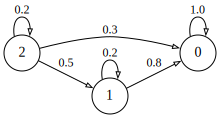

In [5]:
marchie.to_graph(use_canonical=False)

Do not forget to follow the rules of building the components:

1. Probabilities must be in a range $[0; 1]$;
2. All the row must be stochastic;
3. Transition matrix must be square;
4. The number of states in the transition matrix and in the initial distribution vector must coincide.

When any of the rules is violated, you'll get an `AssertionError`.

In [6]:
trans_mat = np.array([
    [1,     0,     0  ],
    [0.8,   0.2,   0  ]
])
marchie = MarChie(trans_mat=trans_mat)

AssertionError: Transition matrix should be a square matrix.

# Basic Tasks

The three basic task of Markov Chain theory are:

1. Calculate the probabilities of transitions in $n$ steps i.e. that having begun in the state $i$, the system will end up in the state $j$ having made $n$ steps.

2. Calculate distribution of states at the moment $n$ i.e. what the probability that at the moment $n$ the system is in a state $i$ is.

3. Calculate the probabilities of the first transition in exactly $n$ / $n$ or less steps i.e. that having begun in the state $i$, the system will find itself in the state $j$ for the first time having made exactly $n$ / $n$ or less steps.

### Transition Matrix in $n$ Steps

The matrix of transitions in $n$ steps $P^{(n)}$ equals $n$-th power of the matrix of transitions in one step $P$:

$$
P^{(n)} = P^n
$$

`MarChie` has a function `trans_insteps` that calculates the matrix of transitions in $n$ steps.

In [7]:
trans_mat = np.array([
    [0.3,   0,     0.7],
    [0.8,   0.1,   0.1],
    [0.3,   0.5,   0.2]
])
marchie = MarChie(trans_mat=trans_mat)

marchie.trans_insteps(n_steps=1000, use_canonical=False)

_matrix([[0.40606061, 0.21212121, 0.38181818],
         [0.40606061, 0.21212121, 0.38181818],
         [0.40606061, 0.21212121, 0.38181818]])

In [8]:
marchie.trans_insteps(n_steps=1, use_canonical=False) # transition matrix `P`

_matrix([[0.3, 0. , 0.7],
         [0.8, 0.1, 0.1],
         [0.3, 0.5, 0.2]])

 ### Distribution of States at the Moment $n$

The distribution of the states $\pi^{(n)}$ at the moment $n$ is actually defined by the initial states distribution $\pi^{(0)}$ and the matrix of transitions in $n$ steps $P^{(n)}$:

$$
\pi^{(n)} = \pi^{(0)}P^{(n)} = \pi^{(0)}P^n
$$

`MarChie` has a function `states_insteps` that calculates the states distribution in $n$ steps.

In [9]:
trans_mat = np.array([
    [0.3,   0.7],
    [1,     0  ]
])
init_distr = np.array(
    [0.5,   0.5]
)
marchie = MarChie(
    init_distr=init_distr,
    trans_mat=trans_mat
)

marchie.states_insteps(n_steps=10, use_canonical=False)

_matrix([0.58574287, 0.41425713])

In [10]:
marchie.states_insteps(n_steps=0, use_canonical=False) # the initial distribution π(0)

_matrix([0.5, 0.5])

### First Transition in Exactly $n$ / $n$ or Less Steps

To calculate the probability $\^p_{ij}^{(n)}$ of first transition in exactly $n$ steps, we should calculate the probability that for $n - 1$ steps there is no transition from $i$ to $j$ (i.e. the transitions were to any state except $j$), and only on the $n$-th step, it takes place:

$$

\^p^{(n)}_{ij} = \sum _{k \neq j}p_{ik}\^p^{(n - 1)}_{kj}

$$

<font size="1">

NB! The respective matrix might not be stochastic; e.g. with a large enough number of steps, it might become a zero matrix as it'll be impossible to get to a state for the first time in such a big amount of steps.

</font>


For the first transition in $n$ steps or less, it would suffice if this first transition took place at any step $k, k \leq n$. Since these first transitions are independent, we might just sum up their probabilities:

$$

\^p^{(\leq n)}_{ij} = \sum _{t=1}^{n}\^p^t_{ij}

$$

<font size="1">

NB! The respective matrix might not be stochastic; e.g. with a large enough number of steps, it might become a ones matrix, because in a little number of steps, it might be possible to get to several states for the first time with a high probability.

</font>

`MarChie` has functions `first_trans_insteps` and `first_trans_nolaterthan` for the respective tasks.

In [11]:
trans_mat = np.array([
    [0.55,  0.45,  0],
    [0,     0,     1],
    [1,     0,     0]
])
marchie = MarChie(trans_mat=trans_mat)

marchie.first_trans_insteps(n_steps=10, use_canonical=False)

array([[0.        , 0.00207241, 0.00376803],
       [0.        , 0.00685096, 0.        ],
       [0.        , 0.00376803, 0.00685096]])

In [12]:
marchie.first_trans_insteps(n_steps=1000, use_canonical=False)

array([[0.00000000e+000, 1.88598971e-260, 3.42907220e-260],
       [0.00000000e+000, 6.23467672e-260, 0.00000000e+000],
       [0.00000000e+000, 3.42907220e-260, 6.23467672e-260]])

In [13]:
trans_mat = np.array([
    [0.4,   0,     0.6],
    [0.8,   0,     0.2],
    [0.3,   0.5,   0.2]
])
marchie = MarChie(trans_mat=trans_mat)

marchie.first_trans_nolaterthan(n_steps=5, use_canonical=False)

array([[0.9292, 0.618 , 0.9744],
       [0.9764, 0.526 , 0.9488],
       [0.9524, 0.786 , 0.9168]])

In [14]:
marchie.first_trans_nolaterthan(n_steps=100, use_canonical=False)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# Reachability, Communication, Classification

To estimate the evolution of a chain (its end behavior), it's crucial to retrieve information about essentiality of its states (comes lates), as well as about the way they communicate, i.e. which states are reachable from which, which can communicate in both ways etc.

For that, below we'll introduce some basic notions that'll show how the structure of a chain might be analyzed.

### Graph Concept

The first thing we'd want to know is everything about reachability of the states.

When analyzing the structure of a Markov Chain, it's convenient to think of it in terms of a state graph (see the function `to_graph`). Such a graph is built on the transition matrix and gives a comprehensible way to understand it.

Now, thinking in terms of a graph, we'll adopt a couple of concepts:

1. A ***node*** represents a state of the system.

2. An ***edge*** represents a no-zero probability of a one-step transition; thus, an ***edge*** from the ***node*** (i.e. state) $i$ to the ***node*** $j$ means that $p_{ij} > 0$. An ***edge*** from $i$ to $i$ is called a ***loop***.

3. A ***path*** is a sequence of ***edges*** from one ***node*** to another; an existence of a ***path*** from $i$ to $j$ means that there are ***edges*** $(i, k_0), (k_0, k_1), ..., (k_{n - 1}, j)$, which implies $p_{ik_0} > 0, p_{k_0k_1} > 0$ etc. A ***path*** can be simpler described by just a sequence of ***nodes*** it comes through: $(i, k_0, k_1, ..., j)$.

4. ***Length of a path*** equals the number of the ***edges*** it consists of.

5. A path where the start and the end coincide, is call a ***contour***.

For example, in the graph below, there are ***nodes*** $0$, $1$, $2$, ***edges*** $(0, 0)$, $(0, 1)$, $(1, 0)$, $(1, 2)$, $(2, 2)$ (where $(0, 0)$ and $(2, 2)$ are ***loops***); there exists a ***path*** from $0$ to $2$: $(0, 1, 2)$, but not from $2$ to $0$. The ***path*** $(0, 1, 0)$ is an example of a ***contour***.

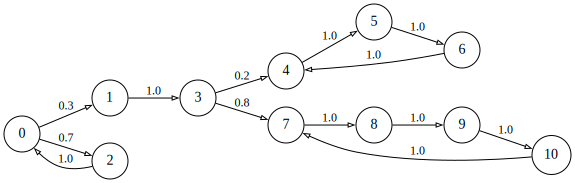

In [15]:
trans_mat = np.array([            
    [0,     0.3,   0.7,   0,     0,     0,     0,     0,     0,     0,     0],
    [0,     0,     0,     1,     0,     0,     0,     0,     0,     0,     0],
    [1,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
    [0,     0,     0,     0,     0.2,   0,     0,     0.8,   0,     0,     0],
    [0,     0,     0,     0,     0,     1,     0,     0,     0,     0,     0],
    [0,     0,     0,     0,     0,     0,     1,     0,     0,     0,     0],
    [0,     0,     0,     0,     1,     0,     0,     0,     0,     0,     0],
    [0,     0,     0,     0,     0,     0,     0,     0,     1,     0,     0],
    [0,     0,     0,     0,     0,     0,     0,     0,     0,     1,     0],
    [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     1],
    [0,     0,     0,     0,     0,     0,     0,     1,     0,     0,     0]
])
marchie = MarChie(trans_mat=trans_mat)

marchie.to_graph(use_canonical=False)

## Communication

### Adjacency Matrix
The first thing we'll need is the ***adjacency matrix***. An ***adjacency matrix*** $A$ shows existence of edges between nodes.

$$

A = (a_{ij}) | a_{ij} =
\begin{cases}

    1, & p_{ij} > 0     \\
    0, & p_{ij} = 0

\end{cases}

$$

In `MarChie`, the adjacency matrix is accessible in the `adjacency_mat` attribute.

In [16]:
marchie.adjacency_mat

_matrix([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

### Reachability Matrix

The next thing is ***reachability matrix*** $D$, that shows existence of path between nodes. Existence of a path from $i$ to $j$ is denoted as $i \rightarrow j$.


$$

D = (d_{ij}) | d_{ij} =
\begin{cases}

    1, & \exists i \rightarrow j        \\
    0, & \neg \exists i \rightarrow j
    
\end{cases}

$$

For the reachability matrix, refer to the `reachability_mat` attribute.

In [17]:
marchie.reachability_mat

_matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

### Transposed Reachability Matrix

To analyze the bidirectionality of the path, we'll need the **transposed reachability matrix** $D^T$. In other words, while the reachability matrix will show if $i \rightarrow j$, the **transposed reachability matrix** will show if $j \rightarrow i$ at the same matrix position (which is important for further computations).

$$

D^T = (d^T_{ij}) | d^T_{ij} =
\begin{cases}

    1, & \exists j \rightarrow i        \\
    0, & \neg \exists j \rightarrow i

\end{cases}

$$


This matrix is stored in the `reachability_mat_tr` attribute.

In [18]:
marchie.reachability_mat_tr

_matrix([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]])

### Communication Matrix

Two nodes communicate if there is a bidirectional path between them: from one to another and back. For example, nodes $i$ and $j$ communicate iff $i \rightarrow j$ and $j \rightarrow i$. The information about communication is stores in the ***communication matrix*** $C$, which is understandably computed from the reachability matrix (shows path in one direction) and the transposed reachability matrix (shows paths in the opposite).

$$

C = (c_{ij}) = D \times D^T | c_{ij} = 

\begin{cases}

    1, & d_{ij} = d_{ji} = 1        \\
    0, & \neg (d_{ij} = d_{ji} = 1)

\end{cases}

$$


The communication matrix is accessible in the `communication_mat` attribute.

In [19]:
marchie.communication_mat

_matrix([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

### Communication Matrix Complement

For further computation we'll need the ***communication matrix complement*** $\overline C$: it'll show which nodes do not communicate.

$$

\overline C = (\overline c_{ij}) | \overline c_{ij} = 
\begin{cases}
    1, & c_{ij} = 0     \\
    0, & c_{ij} = 1
\end{cases}

$$

This matrix is stored in the `communication_mat_comp` attribute.

In [20]:
marchie.communication_mat_comp

_matrix([[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])

## Classification

### Essential and Inessential States

Finally, we came to ***essential*** and ***inessential*** states. The idea is very simple: an ***essential*** state communicates with **every** state it has path to. In opposite, an ***inessential*** state has at least one not bidirectional path.

In formal terms:

$$

i \in S_e \ \iff 
\forall j: \quad i \rightarrow j \Longrightarrow\; j \rightarrow i

$$

$$

i \in S_{ie} \ \iff 
\neg \forall j: \quad i \rightarrow j \; \Longrightarrow\; j \rightarrow i

$$


<font size="1">

Here and further: $S_e$ is the set of essential states, $S_{ie}$ is the set of inessential states.

</font>

### Classification Matrix and Classification Matrix Extension

To reveal which states are inessential, the ***classification matrix*** $T$ is used. Since an inessential state is one that doesn't communicate with all the states it has path to, it only makes sense that the ***classification matrix*** is built with the reachability matrix (shows all the paths) and the communication matrix complement (shows absence of communication).

$$

T = D \times \overline C = (t_{ij}) | t_{ij} = 
\begin{cases}

    1, & d_{ij} = \overline c_{ij} = 1      \\
    0, & \neg (d_{ij} = \overline c_{ij} = 1)

\end{cases}

$$

If $t_{ij} = 1$, the state $i$ is inessential (since it does not communicate with $j$). To summarize the information about essentiality of states from the  ***classification matrix***, the  ***classification matrix extension*** $T_{ext}$ is used. Its meaning is very simple: an additional column with number $N + 1$ is concatenated to the ***classification matrix***; $t_{i(N + 1)} = 1$ iff $i$ is inessential state. Thus, the last column of $T_{ext}$ splits all the states into essential and inessential states.

$$

T_{ext} = T|(t_{i(N + 1)}) | t_{i(N + 1)} = 
\begin{cases}
    1, & \exists j \, t_{ij} = 1        \\
    0, & \neg \exists j \, t_{ij} = 1
\end{cases}

$$

Classification matrix and its extension can be found in the attributes `classification_mat` and `classification_mat_ext` respectively.

In [21]:
marchie.classification_mat

_matrix([[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [22]:
marchie.classification_mat_ext

_matrix([[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Essential_states: [4, 5, 6, 7, 8, 9, 10]
Inessential_states: [0, 1, 2, 3]


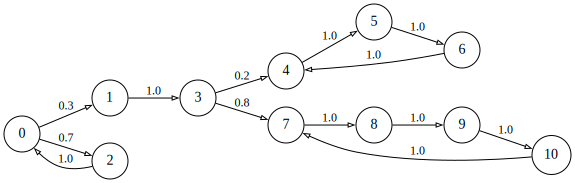

In [23]:
extension = marchie.classification_mat_ext[:, -1]
essential_states, = np.where(extension == 0)
inessential_states, = np.where(extension)

print(f'Essential_states: {essential_states.tolist()}')
print(f'Inessential_states: {inessential_states.tolist()}')

marchie.to_graph(use_canonical=False)

### Equivalency Classes

The set of essential states is uniquely split into so-called ***equivalency classes*** (EC) - classes of communicating essential states. Two essential states belong to the same ***equivalency class*** iff they communicate. The sense of such a split is that each ***equivalency class*** is closed i.e. having gotten to an ***equivalency class***, the system will stick there forever, always transiting between the states of this ***equivalency class***. 

If an ***equivalency class*** contains a single state, both the class and the state are called an ***absorbing***.

If an ***equivalency class*** contains multiple states, it has a contour going through all the states.

### Equivalency Classes Matrix

To define belonging of the states to the equivalency classes, the ***equivalency classes matrix*** $K$ is used. It is created as follows:

1. From communication matrix C all the rows and columns of inessential states are removed.

2. After that groups of coinciding rows will remain.

3. Having left a single unique row from each group, we get the ***equivalency classes matrix***.

$$
K = (k_{ij}) | k_{it} \Longleftrightarrow i \in EC_t
$$

`MarChie` has the attribute `equivalency_cls_mat` for that.

In [24]:
marchie.equivalency_cls_mat

_matrix([[1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 1, 1, 1, 1]])

In [25]:
for i, row in enumerate(marchie.equivalency_cls_mat):
    eq_class, = np.where(row)
    print(f'Equivalency class {i}: {eq_class.tolist()}')

Equivalency class 0: [0, 1, 2]
Equivalency class 1: [3, 4, 5, 6]


### Cyclic Subclasses

If we take a look at an equivalency class, we can conclude all the states that belong to it communicate with themselves (naturally, if $i, j \in EC_k$, fair that $i \rightarrow j$ and $j \rightarrow i$, hence, $i \rightarrow i$). In other words, there is a number of contours that go through each state of an equivalency class. If we consider the length of all the contours that go through such a state $i$, their greatest common divisor $d_i$ will be the ***period*** of the EC:

$$
d = \text{GCD}(|(i \rightarrow i)_1|, ..., |(i \rightarrow i)_r|)
$$

It is proven, that all the states of an equivalency class have the same ***period***.

If $d = 1$, the equivalency class is ***regular***. Otherwise, it's **cyclic** and can be split into $d$ ***cyclic subclasses*** $C_1$, $C_2$, ..., $C_d$.

In a ***cyclic subclass***, all the states that belong to it, do not have edges between them. Furthermore, the ***cyclic subclasses*** of an equivalency class are cyclicly closed: $C_1 \rightarrow C_2  \rightarrow ...  \rightarrow C_d  \rightarrow C_0$. That means for each ***cyclic subclass*** $C_k$, its states have paths only to the states of the ***cyclic subclass*** $C_{k + 1}$.

Just in case: image definition used with `MarChie` when retrieving cyclic subclasses:

Image of a node is a set of all nodes it has a one-step path to:
$$
\Gamma(i) = \{{j | a_{ij} = 1}\}
$$

<br>

Image of a set of nodes is a union of images of all its nodes:
$$
\Gamma(B) = \bigcup_{i \in  B} \Gamma(i)
$$

To get a more representative understanding of the conceptual meaning of cyclic subclasses, let's consider two examples below.

On the first, $C_1 = \{0, 1\}, C_2 = \{2, 3\}, C_3 = \{5\}$. As one can see, the nodes in the subclasses are not bound with edges (e.g. $0 \nrightarrow 1$ and $1 \nrightarrow 0$), the edges lead from on cyclic subclass to another (e.g. $0, 1 \in C_1 \rightarrow 2, 3 \in C_2$ respectively), all the subclasses are closed (there are only contours like $(0, 1 \in C_1 \rightarrow 2, 3 \in C_2 \rightarrow 4 \in C_3 \rightarrow 0, 1 \in C_1)$ respectively). Here $d = 3$.

On the second example, there are contours like $(1 \rightarrow 3 \rightarrow 5 \rightarrow 1)$ and $(1 \rightarrow 2 \rightarrow 4 \rightarrow 5 \rightarrow 1)$. And really, if you try to mentally assume those two contours to be cycles and imagine simultaneous transitions along those, you'll see that they are not "coordinated", that is, that having begun in one assumed subclass, the system does not go into every other assumed subclass simultaneously, as it should be.

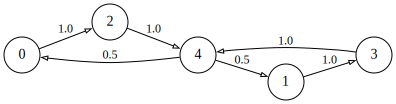

In [26]:
trans_mat = np.array([
    [0,   0,   1,   0,   0],
    [0,   0,   0,   1,   0],
    [0,   0,   0,   0,   1],
    [0,   0,   0,   0,   1],
    [0.5, 0.5, 0,   0,   0]
])
cyclic_marchie = MarChie(trans_mat=trans_mat)

cyclic_marchie.to_graph(use_canonical=False)

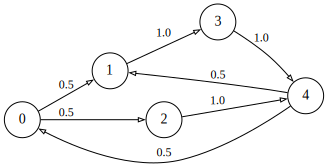

In [27]:
trans_mat = np.array([
    [0,   0.5, 0.5, 0,   0],
    [0,   0,   0,   1,   0],
    [0,   0,   0,   0,   1],
    [0,   0,   0,   0,   1],
    [0.5, 0.5, 0,   0,   0]
])
cyclic_marchie = MarChie(trans_mat=trans_mat)

cyclic_marchie.to_graph(use_canonical=False)

You'll find out how to retrieve cyclic subclass in a couple of cell.

### Canonical Numbering

In order to analyze the evolution of a Markov Chain efficiently, its states should be numbered ***canonically***. ***Canonical numbering*** allows to represent the transition matrix in a form of a block matrix that'd contain submatrices, managing transitions between different subsets of states: sets of essential / inessential states, equivalency classes, cyclic subclasses. That will allow to apply some techniques when computing end behavior.

<br>
<br>

To number states ***canonically***, we first need to build ***natural numbering*** inside equivalency classes.

Let us have an equivalency class with $N_{EC}$ states:

$$
\exists EC | EC = \{C_1, C_2, ..., C_{d}\}, \quad |C_k| = r_k     \\
$$

$$
\sum_{k = 1}^{d}r_k = N_{EC}
$$

Then ***natural numbering*** of this class will be just ordering all the states from the first to the last in each cyclic subclass and then ordering the subclasses the same way:

$C_0: \quad 1, \quad 2, \quad 3, \quad ..., \quad r_0$

$C_1: \quad r_0 + 1, \quad r_0 + 2, \quad ..., \quad r_1$

$...$

$C_{d - 1}: r_0 + r_1 + ... + r_{d - 1} + 1, \quad r_0 + r_1 + ... + r_{d - 1} + 2, \quad ..., \quad r_0 + r_1 + ... + r_{d - 1} + r_{d} = N_{EC}$

<br>
<br>

Now we can scale to the whole chain. Let us have a chain with several equivalency classes and inessential states: 

$$
\exists S_e = \{EC_1, EC_2, ..., EC_L\}, S_ie
$$

$$
\sum_{i = 1}^L N_{EC_i} = N_e
$$

$$
\sum_{i = 1}^L N_{EC_i} + N_{ie} = N
$$

If we number states in equivalency classes ***naturally*** and the finally order equivalency classes the same way (from the first to the last), leaving inessential states in the very tail, we'll get ***canonical numbering***:

$EC_1: \quad 1, \quad 2, \quad 3, \quad ..., \quad N_{EC_1} \quad$ - ***naturally*** numbered

$EC_2: \quad N_{EC_1} + 1, \quad N_{EC_1} + 2, \quad ..., \quad N_{EC_2} \quad$ - ***naturally*** numbered

$...$

$EC_L: \quad N_{EC_{L - 1}} + 1, \quad N_{EC_{L - 1}} + 2, \quad ..., \quad N_{EC_L} = N_e \quad$ - ***naturally*** numbered

$S_{ie}: \quad N_e + 1, \quad N_e + 2, \quad ..., \quad N_e + N_{ie} = N \quad$ - numbered as is

### `structure` in `MarChie`

One thing left before the full structural analysis of a Markov Chain is complete.

For now, let's see how we can access all the structure stuff we've made above. For that, `MarChie` has an attribute called `structure`. It contains information about chain's essential and inessential states, its equivalency classes and their cyclic subclasses, both in canonical and original numbering.

Calling `structure` will give an overview on the structure of the chain. The structure is enclosed into a `ChainStructure` class instance.

NB! By default all the states are ordered canonically, but numbered originally.

In [28]:
structure = marchie.structure
structure

Markov Chain
|
|___Essential States
    |
    |___Cyclic Equivalency Class 0
        |
        |___Cyclic Subclass 0: states 4
        |
        |___Cyclic Subclass 1: states 5
        |
        |___Cyclic Subclass 2: states 6
|
    |___Cyclic Equivalency Class 1
        |
        |___Cyclic Subclass 0: states 7
        |
        |___Cyclic Subclass 1: states 8
        |
        |___Cyclic Subclass 2: states 9
        |
        |___Cyclic Subclass 3: states 10
|
|___Inessential States: states 0, 1, 2, 3

Calling `structure.states`, `structure.essential_states` and `structure.inessential_states` states will return lists of all states, essential and inessential states respectively.

In [29]:
marchie.structure.states

[State 4, canonical number: 0,
 State 5, canonical number: 1,
 State 6, canonical number: 2,
 State 7, canonical number: 3,
 State 8, canonical number: 4,
 State 9, canonical number: 5,
 State 10, canonical number: 6,
 State 0, canonical number: 7,
 State 1, canonical number: 8,
 State 2, canonical number: 9,
 State 3, canonical number: 10]

In [30]:
marchie.structure.essential_states

[State 4, canonical number: 0,
 State 5, canonical number: 1,
 State 6, canonical number: 2,
 State 7, canonical number: 3,
 State 8, canonical number: 4,
 State 9, canonical number: 5,
 State 10, canonical number: 6]

In [31]:
marchie.structure.inessential_states

[State 0, canonical number: 7,
 State 1, canonical number: 8,
 State 2, canonical number: 9,
 State 3, canonical number: 10]

Each state is an instance of a `State` class, that contains information about original and canonical number of the state, it's essentiality and (if applicable), its belonging to an equivalency class and a cyclic subclass.

In [32]:
state = marchie.structure.states[0]
print(
    f'Original number: \t{state.id}',
    f'Canonical number: \t{state.canonical_number}',
    f'Essential: \t{state.essential}',
    f'Equivalency class: \t{state.equivalency_class}',
    f'Cyclic subclass: \t{state.cyclic_subclass}',
    sep='\n'
)

Original number: 	4
Canonical number: 	0
Essential: 	True
Equivalency class: 	0
Cyclic subclass: 	0


In [33]:
state = marchie.structure.states[-1]
print(
    f'Original number: \t{state.id}',
    f'Canonical number: \t{state.canonical_number}',
    f'Essential: \t{state.essential}',
    f'Equivalency class: \t{state.equivalency_class}',
    f'Cyclic subclass: \t{state.cyclic_subclass}',
    sep='\n'
)

Original number: 	3
Canonical number: 	10
Essential: 	False
Equivalency class: 	None
Cyclic subclass: 	None


To access equivalency classes and cyclic subclasses, use attributes `structure.equivalency_classes` and `structure.cyclic_subclasses` respectively.

In [34]:
marchie.structure.equivalency_classes

[Cyclic Equivalency Class 0
 |
 |___Cyclic Subclass 0: states 4
 |
 |___Cyclic Subclass 1: states 5
 |
 |___Cyclic Subclass 2: states 6,
 Cyclic Equivalency Class 1
 |
 |___Cyclic Subclass 0: states 7
 |
 |___Cyclic Subclass 1: states 8
 |
 |___Cyclic Subclass 2: states 9
 |
 |___Cyclic Subclass 3: states 10]

In [35]:
marchie.structure.cyclic_subclasses

[Cyclic Subclass 0: states 4,
 Cyclic Subclass 1: states 5,
 Cyclic Subclass 2: states 6,
 Cyclic Subclass 0: states 7,
 Cyclic Subclass 1: states 8,
 Cyclic Subclass 2: states 9,
 Cyclic Subclass 3: states 10]

Equivalency classes are stored in `EquivalenceClass` objects. They contain the number of an equivalency classes, its period $d$, belonging states and cyclic subclasses.

In [36]:
eq_class = marchie.structure.equivalency_classes[1]
print(
    f'Class number: \t{eq_class.id}',
    f'Period: \t{eq_class.d}',
    f'States: \t{eq_class.states}',
    f'Cyclic subclasses: \t{eq_class.cyclic_subclasses}',
    sep='\n'
)

Class number: 	1
Period: 	4
States: 	[State 7, canonical number: 3, State 8, canonical number: 4, State 9, canonical number: 5, State 10, canonical number: 6]
Cyclic subclasses: 	[Cyclic Subclass 0: states 7, Cyclic Subclass 1: states 8, Cyclic Subclass 2: states 9, Cyclic Subclass 3: states 10]


Cyclic subclasses are stored in `CyclicSubclass` objects. They contain its number withing the equivalency class, the equivalency class it belongs to and its states.

In [37]:
subclass = marchie.structure.cyclic_subclasses[2]
print(
    f'Subclass number: \t{subclass.id}',
    f'Equivalency class: \t{subclass.class_id}',
    f'States: \t{subclass.states}',
    sep='\n'
)

Subclass number: 	2
Equivalency class: 	0
States: 	[State 6, canonical number: 2]


Once again, all the states are stored in `State` objects and by default are ordered canonically, but numbered originally; however, all the three `ChainStructure`, `EquivalenceClass` and `CyclicSubclass` allow to retrieve original and canonical numbers of states as lists of integers: properties `original_states` and `canonical_states` for all three, `original_essential_states`, `canonical_essential_states`, `original_inessential_states`, `canonical_inessential_states` only in `ChainStructure` (since the equivalency classes and cyclic subclasses only contain essential states).

In [38]:
eq_class.original_states

[7, 8, 9, 10]

In [39]:
subclass.canonical_states

[2]

In [40]:
structure.canonical_inessential_states

[7, 8, 9, 10]

In [41]:
structure.original_states

[4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3]

To access the canonical numbering (see the mapping), you can use the `canonical mapping` attribute. Its keys are the original numbers, while values store the respective canonical numbers.

In [42]:
marchie.canonical_mapping

{4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5, 10: 6, 0: 7, 1: 8, 2: 9, 3: 10}

Also, all the matrices that we introduced in section *Reachability, Communication, Classification. Communication* (like adjacency, reachability, communication etc. matrices) are stored in `MarChie.matrix` objects. The only really important difference from `numpy.ndarray` is that `MarChie.matrix` have the `canonical` attribute, that returns the same matrix but with the states numbered canonically.

In [43]:
marchie.trans_mat # original numbering
 

_matrix([[0. , 0.3, 0.7, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.8, 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ]])

In [44]:
marchie.trans_mat.canonical # canonical numbering

_matrix([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.7, 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
         [0.2, 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

### Markov Chain Class

Finally, we can classify our Markov Chain. It is the class of a Markov Chain that will define how it will evolve (well, technically, it's the chain structure, but exactly it determines the class, so it's basically the same thing).

1. $S_{ie} = \varnothing, \quad S_e = {EC} \Longrightarrow$ ergodic / irreducible Markov Chain

    $\quad$ 1.1. $EC$ is regular $\Longrightarrow$ regular irreducible Markov Chain

    $\qquad$ 1.1.1. $EC$ is absorbing $\Longrightarrow$ absorbing irreducible Markov Chain

    $\quad$ 1.2. $EC$ is cyclic $\Longrightarrow$ cyclic irreducible Markov Chain

2. $S_{ie} \neq \varnothing \Longrightarrow$ reducible Markov Chain

    $\quad$ 2.1. a single $EC \Longrightarrow$ monoergodic Markov Chain

    $\qquad$ 2.1.1. the single $EC$ is regular $\Longrightarrow$ regular monoergodic Markov Chain

    $\qquad \quad$ 2.1.1.1. the single $EC$ is absorbing $\Longrightarrow$ absorbing monoergodic Markov Chain

    $\qquad$ 2.1.2. the single $EC$ is cyclic $\Longrightarrow$ cyclic monoergodic Markov Chain

    $\quad$ 2.2. more than one $EC$-s $\Longrightarrow$ polyergodic Markov Chain

    $\qquad$ 2.2.1. all the $EC$-s are regular $\Longrightarrow$ regular polyergodic Markov Chain

    $\qquad \quad$ 2.2.1.1. all the $EC$-s are absorbing $\Longrightarrow$ absorbing polyergodic Markov Chain

    $\qquad$ 2.2.2. all the $EC$-s are cyclic $\Longrightarrow$ cyclic polyergodic Markov Chain

    $\qquad$ 2.2.3. there are both regular and cyclic $EC$-s $\Longrightarrow$ mixed polyergodic Markov Chain

Note that only regular chains actually empirically converge to their end matrices strongly.

In the `MarChie`, there is no such thing as a label of the Chain type - there's no need. Instead, the attribute `properties` encodes the types with their boolean properties uniquely.

The properties are:

* `reducible`: $\quad$ `True` if there are inessential states, `False` otherwise

* `polyergodic`: $\quad$ `True` if there are more than one $EC$, `False` otherwise

* `regular`: $\quad$ `True` if regular, `False` if cyclic, `None` if mixed

* `absorbing`: $\quad$ `True` if absorbing (only if regular), `False` otherwise

* `strong_convergence`: $\quad$ `True` if the matrix strongly converges to a final matrix in a great number of steps (only if regular), `False` otherwise


Thus, we have a "linguistic-like" notation with a set of properties each of which may be either "plus" or "minus", e.g. a cyclic polyergodic Markov Chain could be notated so:
```text
[+reducible][+polyergodic][-regular][-absorbing][-strong_convergence]
```

In [45]:
properties = marchie.properties
properties

[+reducible][+polyergodic][-regular][-absorbing][-strong_convergence]

You can also access type of the chain in `type_label` property of `properties` attribute

In [46]:
marchie.properties.type_label

'Polyergodic Cyclic'

In [47]:
print(
    f'Reducible: \t{properties.reducible}',
    f'Polyergodic: \t{properties.polyergodic}',
    f'Regular: \t{properties.regular}',
    f'Absorbing: \t{properties.absorbing}',
    f'Strong convergence: \t{properties.strong_convergence}',
    sep='\n'
)

Reducible: 	True
Polyergodic: 	True
Regular: 	False
Absorbing: 	False
Strong convergence: 	False


To summarize: all that is done in section *Reachability, Communication, Classification* is the full structural analysis of a Markov Chain.

Once again, that includes:

1. General analysis of the structure of the chain: defining essential and inessential states.

2. Splitting the set of essential states into equivalency classes.

3. Structural analysis of each equivalency class i.e. determining cyclic subclasses.

4. Classification of the chain (its type) and canonical numbering.

# End Behavior

### Convergence Theorems for Markov Chains

***Convergence Theorems for Markov Chains*** define the evolution of Markov Chains on a number of steps limiting to infinity: transition matrix and states distributions in $n$ steps; transition matrix limits to the ***end transition matrix*** $\Pi$, states distribution vector - to the ***end states distribution vector*** $\pi$:

$$
\lim_{n \to \infty} P^{(n)} = \Pi
$$
$$
\lim_{n \to \infty} \pi^{(n)} = \pi
$$

In general, ***Convergence Theorems*** just describe how different types of Markov Chains converge to their $\Pi$ and $\pi$ and how these end matrices will look like. ***Convergence Theorems*** for different types will be given below.

#### NB! For end behavior forecasting, a chain should be *numbered canonically*!

Meanwhile, there are some terms that need to be defined:

1. Vector $\pi = (\pi_1, ..., \pi_N)$ is called a ***static stochastic vector*** of a matrix $P$ if $\quad \pi P = \pi, \quad \sum_{i = 1}^N \pi_i = 1, \quad \pi_i \geq 0$

2. Vector $\pi = (\pi_1, ..., \pi_N)$ is called a ***static strictly stochastic vector*** of a matrix $P$ if $\quad \pi P = \pi, \quad \sum_{i = 1}^N \pi_i = 1, \quad \pi_i > 0$

3. States distribution vector at $n$-th step $\pi^{(n)} = \pi^{(0)} P^n$ is a ***stationary vector***, if it's independent of $n$, i.e. $\quad \pi^{(n_0)} = \pi^{(n_1)} = \pi^{(n_2)} = ..., \quad n_i \to \infty$

4. Any ***static (strictly) stochastic vector*** in a Markov Chain is ***stationary***: $\quad \pi^{(n_0)} P = \pi^{(n_1)} P = \pi^{(n_2)} P = \pi P = \pi, \quad \lim_{n_i \to \infty} \pi^{(n_i)} = \pi$

5. ***Euler regularized matrix*** $\hat P$ is a matrix such that:

$$

\hat P = (\hat p_{ij}) = \alpha I + (1 - \alpha) P | \hat p_{ij} =
\begin{cases}

    (1 - \alpha) p_{ij}, & i \neq j     \\
    (1 - \alpha) p_{ij} + \alpha, & i = j

\end{cases},
\quad 0 < \alpha < 1

$$

$\qquad$ where $I$ is an identity matrix of shape $(N, N)$

6. A sequence of matrices $\{P\} = \{P, P^{(2)}, ..., P^{(n)}\}, \quad n \to \infty$ ***converges*** to the final transition matrix $\Pi = (\pi_{ij})$ ***strongly***, if the element-wise convergence takes place: $\quad \lim_{n \to \infty} p_{ij} = \pi_{ij}$ 

7. A sequence of matrices $\{P\} = \{P, P^{(2)}, ..., P^{(n)}\}, \quad n \to \infty$ ***converges*** to the final transition matrix $\Pi = (\pi_{ij})$ ***weakly***, if the sequence of matrices $\{\hat P\} = \{\hat P, \hat P^{(2)}, ..., \hat P^{(n)}\}, \quad n \to \infty$ ***converges*** to the final transition matrix ***strongly***: $\quad \lim_{n \to \infty} \hat p_{ij} = \pi_{ij}$

8. A sequence of vectors $\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\}, \quad n \to \infty$ ***converges*** to the final states distribution vector $\pi =  (\pi_1, ..., \pi_N)$ ***strongly***, if the element-wise convergence takes place: $\quad \lim_{n \to \infty} \pi^{(0)}_i = \pi_{i}$ 

9. A sequence of vectors $\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\}, \quad n \to \infty$ ***converges*** to the final states distribution vector $\pi =  (\pi_1, ..., \pi_N)$ ***weakly***, if the sequence of vectors $\{\hat \pi^{(0)}\} = \{\hat \pi^{(0)}, \hat \pi^{(1)}, ..., \hat \pi^{(n)}\}, \quad n \to \infty$ ***converges*** to the final states distribution vector ***strongly***: $\quad \lim_{n \to \infty} \hat \pi^{(0)}_i = \pi_{i}$ 

8. Only regular chains have ***strong convergence*** to their end matrices, mixed and cyclic chains ***converge weakly***.

For end transition matrix / states distribution vector calculation, at some point we'll need Cramer's rule for solving square equation system (where the number of equations equals the number of variables).

Suppose we have an equation system:

$\exists
\begin{cases}
    \alpha_0 \pi_0 + \beta_0 \pi_1 + ... + \delta_0 \pi_k = s_0 \\
    \alpha_1 \pi_0 + \beta_1 \pi_1 + ... + \delta_1 \pi_k = s_1 \\
    ... \\
    \alpha_k \pi_0 + \beta_k \pi_1 + ... + \delta_k \pi_k = s_k
\end{cases} \\
$ 

<br>
<br>

The first thing we want to do is to define matrix of coefficients $A$ and column vector of solutions $S$:

$
A = (k \times h) = 
\begin{pmatrix}
    \alpha_0 & \beta_0 & ... & \delta_0 \\
    \alpha_1 & \beta_1 & ... & \delta_1 \\
    ... & ... & ... & ... \\
    \alpha_k & \beta_k & ... & \delta_k \\
\end{pmatrix} \\
$

<br>

$
S = 
\begin{pmatrix}
    s_0 \\
    s_1 \\
    ... \\
    s_k \\
\end{pmatrix} \\
$

<br>
<br>

Let's adopt $\Delta$: the determinant of $A$:

$
\Delta = \det(A) =
\begin{vmatrix}
    \alpha_0 & \beta_0 & ... & \delta_0 \\
    \alpha_1 & \beta_1 & ... & \delta_1 \\
    ... & ... & ... & ... \\
    \alpha_k & \beta_k & ... & \delta_k \\
\end{vmatrix} \\ 
$

<br>
<br>

Then, to calculate each unknown variable $\pi_i, \quad i = (0, 1, ..., k)$, for each $i$ we should do the following:

1. Define local coefficients matrix $A_i$, substituting the column at index $i$ in $A$ with the solutions column $S$:

$
\qquad A_{(i)} = 
\begin{pmatrix}
    \alpha_0 & \beta_0 & ... & (i) & ... & \delta_0 \\
    \alpha_1 & \beta_1 & ... &  & ... &\delta_1 \\
    ... & ... & ... & S & ... & ... &\\
    \alpha_k & \beta_k & ... &  & ... &\delta_k \\
\end{pmatrix}
= \begin{pmatrix}
    \alpha_0 & \beta_0 & ... & s_0 & ... & \delta_0 \\
    \alpha_1 & \beta_1 & ... & s_1 & ... & \delta_1 \\
    ... & ... & ... & ... & ... & ... & \\
    \alpha_k & \beta_k & ... & s_k & ... & \delta_k \\
\end{pmatrix} \\
$

<br>

2. Define local determinant $\Delta_i$ of $A_i$:

$
\qquad \Delta_i = \det(A_i) =
\begin{vmatrix}
    \alpha_0 & \beta_0 & ... & s_0 & ... & \delta_0 \\
    \alpha_1 & \beta_1 & ... & s_1 & ... & \delta_1 \\
    ... & ... & ... & ... & ... & ... & \\
    \alpha_k & \beta_k & ... & s_k & ... & \delta_k \\
\end{vmatrix} \\ 
$

<br>

3. Finally find $\pi_i$ by dividing local determinant $\Delta_i$ by determinant $\Delta$:

$\qquad \pi_i = \frac {\det(A_{(i)})}{\det(A)} = \frac {\Delta_i}{\Delta}$

For the sake of demonstration, let's define a fancy print function that'll get a chain, analyze it, forecast the end behavior and check if it is close to the empirical behavior on a large number of steps.

In [48]:
def blue(string):
    return f'\033[1;34m{string}\033[0;37m'

def violet(string):
    return f'\033[1;35m{string}\033[0;37m'

def red(string):
    return f'\033[1;31m{string}\033[0;37m'

def green(string):
    return f'\033[1;32m{string}\033[0;37m'

def i(states):
    return [str(state) for state in states]

def fancy_forecast(chain):

    canonical_mapping_df = pd.DataFrame(
        data={
            'original': chain.canonical_mapping.keys(),
            'canonical': chain.canonical_mapping.values()
        }
    )
    canonical_mapping = f'{blue("Canonical mapping:")}\n\n{canonical_mapping_df.to_string(index=False)}'
    init_distr_can = f'{blue("Initial states distribution, canonical numbering")} (rounded){blue(":")}\n\n{chain.init_distr.canonical.round(3)}'
    trans_mat_can = f'{blue("Transition matrix, canonical numbering")} (rounded){blue(":")}\n\n{chain.trans_mat.canonical.round(3)}'
    
    inessential_states = ', '.join(i(chain.structure.canonical_inessential_states))
    if not len(inessential_states): inessential_states = '(None)'
    inessential_states = f'{blue("Inessential states:")} {inessential_states}'

    essential_states = []
    for eq_class in chain.structure.equivalency_classes:
        states = f'\n\tEquivalency class {eq_class.id}:\td = {eq_class.d}'
        if eq_class.cyclic_subclasses is None:
            eclass = ', '.join(i(eq_class.canonical_states))
            states += f'\n\t\t(Acyclic):\t{eclass}'
            essential_states.append(states)
        else:
            for cyclic_subclass in eq_class.cyclic_subclasses:
                subclass = ', '.join(i(cyclic_subclass.canonical_states))
                states += f'\n\t\tCyclic subclass {cyclic_subclass.id}:\t{subclass}'
            essential_states.append(states)

    essential_states = '\n\n'.join(essential_states)
    essential_states = f'{blue("Essential states:")}\n\t{essential_states}'

    type_label = f'{blue("Type:")}\t{chain.properties.type_label}'

    convergence = green('strong') if chain.properties.strong_convergence else red ('weak')
    convergence = f'Convergence: {convergence}'

    end_state_distr = f'{blue("End states distribution, forecast")} (rounded){blue(":")}\n\n{chain.end_behavior.end_state_distr.round(3)}'
    end_trans_mat = f'{blue("End transition matrix, forecast")} (rounded){blue(":")}\n\n{chain.end_behavior.end_trans_mat.round(3)}'
    try: time_percentage = f'{blue("States time percentage, forecast")} (rounded){blue(":")}\n\n{chain.end_behavior.time_percentage.round(3)}'
    except: time_percentage = 'States time percentage: not available'

    n_steps = 10000
    end_state_distr_e = f'{blue(f"States distribution in {n_steps} steps")} (rounded){blue(":")}\n\n{chain.trans_insteps(n_steps=n_steps).round(3)}'
    end_trans_mat_e = f'{blue(f"Transition matrix in {n_steps} steps")} (rounded){blue(":")}\n\n{chain.states_insteps(n_steps=n_steps).round(3)}'   


    summary = f'''
        {violet("Canonical Numbering")} (further the states will be numbered canonically)
        
    >> {canonical_mapping}

    >> {init_distr_can}    

    >> {trans_mat_can}

    
        {violet("Classification")}

    >> {inessential_states}
    >> {essential_states}

    >> {type_label}


        {violet("End Behavior. Forecast")}

    >> {convergence}
    >> {end_state_distr}

    >> {end_trans_mat}

    >> {time_percentage}


        {violet("End Behavior. Empirical Data")}

    >> {end_state_distr_e}

    >> {end_trans_mat_e}
    '''

    print(summary)



## Irreducible (Ergodic) Markov Chain

Irreducible (Ergodic) Markov Chain is a chain such that

$\exists P, \pi^{(0)} \\$ 
$S_{ie} = \varnothing, \quad S = S_e = \{EC\} \\$

<br>
<br>

**Theorem**:

1. Sequence $\{P\} = \{P, P^{(2)}, ..., P^{(n)}\}$ converges to the final transition matrix $\Pi$ with identical **static strictly stochastic** rows $\pi = (\pi_1, ..., \pi_N)$ strongly (weekly), if the chain is regular (cyclic):

<br>

$$
\{P\} = \{P, P^{(2)}, ..., P^{(n)}\} \to_{n \to \infty} \Pi
$$

<br>

$$
\Pi = 
\begin{pmatrix}
    \pi \\
    \pi \\
    ... \\
    \pi \\
    \pi
\end{pmatrix}
=
\begin{pmatrix}
    \pi_1 & \pi_2 & ... & \pi_{N - 1} & \pi_N \\
    \pi_1 & \pi_2 & ... & \pi_{N - 1} & \pi_N \\
    ... & ... & ... & ... & ... \\
    \pi_1 & \pi_2 & ... & \pi_{N - 1} & \pi_N \\
    \pi_1 & \pi_2 & ... & \pi_{N - 1} & \pi_N
\end{pmatrix}   \\
$$

<br>
<br>

2. Sequence $\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\}$ converges to the final states distribution vector $\pi = (\pi_1, ..., \pi_N)$ (which is a row of the final $\Pi$) strongly (weekly), if the chain is regular (cyclic):

$$
\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\} \to_{n \to \infty} \pi
$$

<br>
<br>

3. The final vector $\pi$ is static and stationary:

$$
\pi P = \pi
$$

<br>
<br>

4. Expected values of $\nu_j^{(n)}$ - time percentage that the system finds itself in the state $i$ during $n$ steps - converges to the $i$-th element of the final vector $\pi$ strongly (weekly), if the chain is regular (cyclic):

$$
\forall \pi^{(0)}, j: \quad M(\nu_j^{(n)}) \to_{n \to \infty} \pi_j
$$

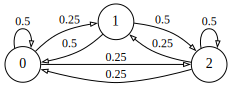

In [49]:
erg_trans_mat = np.array([
    [0.5,   0.25,   0.25],
    [0.5,   0,      0.5],
    [0.25,  0.25,   0.5]
])
erg_marchie = MarChie(trans_mat=erg_trans_mat)

erg_marchie.to_graph()

In [50]:
fancy_forecast(erg_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        0          0
        1          1
        2          2

    >> Initial states distribution, canonical numbering (rounded):

[0.507 0.233 0.26 ]    

    >> Transition matrix, canonical numbering (rounded):

[[0.5  0.25 0.25]
 [0.5  0.   0.5 ]
 [0.25 0.25 0.5 ]]

    
        Classification

    >> Inessential states: (None)
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0, 1, 2

    >> Type:	Ergodic Regular


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[0.4 0.2 0.4]

    >> End transition matrix, forecast (rounded):

[[0.4 0.2 0.4]
 [0.4 0.2 0.4]
 [0.4 0.2 0.4]]

    >> States time percentage, forecast (rounded):

[40. 20. 40.]


        End Behavior. Empirical Data

    >> States distribution in 10000 steps (rounded):

[[0.4 0.2 0.4]
 [0.4 0.2 0.4]
 [0.4 0

## Monoergodic Markov Chain

Monoergodic Markov Chain is a chain such that

$\exists P, \pi^{(0)}\\$
$S_{ie} \neq \varnothing, \quad S_e = \{EC\}$

<br>
<br>

Assuming the states are numbered canonically,
transition matrix $P$ can be represented as follows:

$$
P = 
\begin{pmatrix}
    T & O \\
    R & Q \\
\end{pmatrix},
$$ 

where

$\qquad T = (N_e \times N_e)$ - submatrix managing transitions in $S_e$

$\qquad O = (N_e \times N_{ie}) = (o_{ij}) \, | \, o_{ij} = 0$ - submatrix managing transitions $i \in S_e \rightarrow j \in S_{ie}$

$\qquad R = (N_{ie} \times N_e)$ - submatrix managing transitions $i \in S_{ie} \rightarrow j \in S_e$

$\qquad Q = (N_{ie} \times N_{ie})$ - submatrix managing transitions in $S_{ie}$

<br>
<br>

**Theorem**:

1. Sequence $\{P\} = \{P, P^{(2)}, ..., P^{(n)}\}$ converges to the final transition matrix $\Pi$ with identical rows $\pi = (\pi_1, ..., \pi_{N_e}, \pi_{N_{e} + 1}, ..., \pi_N)$ strongly (weekly), if the chain is regular (cyclic):

<br>

$$
\{P\} = \{P, P^{(2)}, ..., P^{(n)}\} \to_{n \to \infty} \Pi
$$

<br>

$$
\Pi = 
\begin{pmatrix}
    \pi \\
    \pi \\
    ... \\
    \pi \\
    \pi
\end{pmatrix}
=
\begin{pmatrix}
    \pi_1 & \pi_2 & ... & \pi_{N{e}} & \pi_{N{e} + 1} & ... & \pi_{N - 1} & \pi_N \\
    \pi_1 & \pi_2 & ... & \pi_{N{e}} & \pi_{N{e} + 1} & ... & \pi_{N - 1} & \pi_N \\
    ... & ... & ... & ... & ... & ... & ... \\
    \pi_1 & \pi_2 & ... & \pi_{N{e}} & \pi_{N{e} + 1} & ... & \pi_{N - 1} & \pi_N \\
    \pi_1 & \pi_2 & ... & \pi_{N{e}} & \pi_{N{e} + 1} & ... & \pi_{N - 1} & \pi_N
\end{pmatrix} 
$$

<br>
<br>

2. Sequence $\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\}$ converges to the final states distribution vector $\pi = (\pi_1, ..., \pi_{N_e}, \pi_{N_{e} + 1}, ..., \pi_N)$ (which is a row of the final $\Pi$) strongly (weekly), if the chain is regular (cyclic):

$$
\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\} \to_{n \to \infty} \pi
$$

<br>
<br>

3. End vector consists of **static strictly stochastic** subvector $\pi_e$ containing $N_e$ non-zero probabilities of transitions between essential states and $N_ie$ zero probabilities of transitions from essential states to inessential states in subvector $\pi_{ie}$:

$$
\forall \pi = (\pi_e, \, \pi_{ie})  \\
$$

<br>

$$
\pi_e = (\pi_1, \, \pi_2, \, ..., \, \pi_{N_e}), \quad \forall \pi_k \in \pi_e > 0 \\
\pi_{ie} = (\pi_{N_e + 1}, \, \pi_{N_e + 2}, \, ..., \, \pi_N) = (0, \, ..., \, 0) \\
$$

<br>
<br>


4. The final vector $\pi$ and its subvectors $\pi_e$, $\pi_{ie}$ are static and stationary:

$$
\pi P = \pi     \\
\pi_e T = \pi_e     \\
\pi_{ie} O = \pi_{ie}
$$

<br>
<br>

4. Expected values of $\nu_j^{(n)}$ - time percentage that the system finds itself in the state $i$ during $n$ steps - converges to the $i$-th element of the final vector $\pi$ strongly (weekly), if the chain is regular (cyclic):

$$
\forall \pi^{(0)}, j: \quad M(\nu_j^{(n)}) \to_{n \to \infty} \pi_j
$$

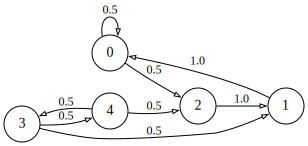

In [51]:
monoerg_trans_mat = np.array([
    [0,   0.5,   0,   0.5,   0  ],
    [0.5, 0,     0,   0,     0.5],
    [0,   0,     0.5, 0,     0.5],
    [0,   0,     1,   0,     0  ],
    [0,   0,     0,   1,     0  ]
])
monoerg_marchie = MarChie(trans_mat=monoerg_trans_mat)

monoerg_marchie.to_graph()

In [52]:
fancy_forecast(monoerg_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        2          0
        3          1
        4          2
        0          3
        1          4

    >> Initial states distribution, canonical numbering (rounded):

[0.023 0.006 0.715 0.076 0.18 ]    

    >> Transition matrix, canonical numbering (rounded):

[[0.5 0.  0.5 0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5]
 [0.  0.  0.5 0.5 0. ]]

    
        Classification

    >> Inessential states: 3, 4
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0, 1, 2

    >> Type:	Monoergodic Regular


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[0.5  0.25 0.25 0.   0.  ]

    >> End transition matrix, forecast (rounded):

[[0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [

## Polyergodic Markov Chain

Polyergodic Markov Chain is a chain such that

$\exists P, \pi^{(0)}\\$ 
$S_{ie} \neq \varnothing, \quad S_e = \{EC_1, EC_2, ..., EC_L\}$

<br>
<br>

Assuming the states are numbered canonically,
transition matrix $P$ can be represented as follows:

$$
P = 
\begin{pmatrix}
T & O \\
R & Q \\
\end{pmatrix} = 
\begin{pmatrix}
T_1 &   &   &   &   \\
  & T_2 &   &   &   \\
  &   & T_3 &   &   & O\\
  &   &   & ... &  \\
  &   &   &   & T_L \\
& & R & & & Q \\
\end{pmatrix},
$$

where

$\qquad T_t = (N_t \times N_t)$ - submatrices managing transitions in $EC_t$

$\qquad O = (N_e \times N_{ie}) = (o_{ij}) \, | \, o_{ij} = 0$ - matrix managing transitions $i \in S_e \rightarrow j \in S_{ie}$

$\qquad R = (N_{ie} \times N_e)$ - matrix managing transitions $ i \in S_{ie} \rightarrow j \in S_e$

$\qquad Q = (N_{ie} \times N_{ie})$ - matrix managing transitions in $S_{ie}$

<br>
<br>

**Theorem**:

1. Sequence $\{P\} = \{P, P^{(2)}, ..., P^{(n)}\}$ converges to the final transition matrix $\Pi$ consisting of essential submatrix $\Pi_e$ and inessential submatrix $\Pi_{ie}$ strongly (weekly), if the chain is regular (cyclic):

<br>

$$
\{P\} = \{P, P^{(2)}, ..., P^{(n)}\} \to_{n \to \infty} \Pi
$$

<br>

$$
\Pi = 
    \begin{pmatrix}
    \Pi_e \\
    \Pi_{ie}
\end{pmatrix},
$$

<br>

$\qquad$ where essential submatrix $\Pi_e$ consists of $L$ rows $\pi_t$, each of which repeats $N_t$ times; in other words, for each $EC_t$, in $\Pi_e$ there are $|EC_t|$ identical rows $\pi_t$:

$$
\Pi_e = 
\begin{pmatrix}
    \pi_1 & (N_1 \; \text{times})\\
    ... \\
    \pi_2 & (N_2 \; \text{times}) \\
    ... \\
    \pi_L & (N_L \; \text{times})
\end{pmatrix},
$$

<br>

$\qquad$ while each $\pi_t$ consists of zeros on the left, standing for transitions into previous equivalency classes, $N_t$ static values in **static stochastic subvector** $\bar \pi_t$, standing for transitions inside $EC_t$, zeros on the right, standing for transitions into following equivalency classes, and further zeros on the right, standing for transitions to inessential states:

$$
\pi_t = (0, \, ..., \, \bar \pi_t, \, ..., \, 0), \quad t = (1, \, 2, \, ..., \, L)
$$
$$
\bar \pi_t T_t = \bar \pi_t
$$
$$
\text{number of nulls on the left from } \bar \pi_t \text{ equals } \sum_{i = 1}^{t - 1} N_i \\
\text{number of nulls on the right from } \bar \pi_t \text{ equals } \sum_{i = t + 1}^L N_i + N_{ie},
$$

<br>
<br>

$\qquad$ and inessential submatrix $\Pi_{ie}$ consists of $N_{ie}$ rows:

$$
\Pi_{ie} = 
\begin{pmatrix}
  \pi_{N_e + 1} \\
  \pi_{N_e + 2} \\
  ... \\
  \pi_N
\end{pmatrix},
$$

<br>

$\qquad$ calculated as

$$
\pi_i = \sum_{t = 1}^L b_{it} \pi_t, \quad i = (N_e + 1, \, N_e + 2, \, ..., \, N),
$$

<br>

$\qquad$ where

$$
B = (b_{ij}) | b_{ij} - \text{'probability of the system to end up in the } j^{th} \text{ state having started in the } i^{th} \text{ state'}
$$

<br>

$$
B = M \times R'
$$
$$
M = (m_{ij}) = (I - Q')^{-1}
$$
$$
I = (N_{ie} \times N_{ie}) - \text{identity matrix}
$$
$$
Q', R' - \text{submatrices of } P' - \text{ a poliergodic absorbing chain we get if we substitute } \\ \text{ all the transitions from inessential states } j \text{ to absorbing classes } EC_t \\ \text{ with transitions from } j \text{ to single absorbing states } t, \quad p'_{jt} = \sum_{i = 1}^{N_t}p_{it}
$$

<br>
<br>

2. Sequence $\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\}$ converges to the initial states distribution $\pi^{(0)}$ multiplied by the end transition matrix $\Pi$ strongly (weekly), if the chain is regular (cyclic):

$$
\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\} \to_{n \to \infty} \pi^{(0)} \Pi
$$

<br>

$\qquad$ while if the initial vector distribution represents a one-probability to start in a state $i$, it the states distribution will converge to the row $i$ of the final transition matrix:

$$
\pi^{(0)} = (0, ..., 1_i, ..., 0) \Longrightarrow \{\pi^{(0)}\} \to_{n \to \infty} \pi_i, \quad i = (1, 2, ..., N)
$$

<br>
<br>

3. Each row $\pi_i$ of the final transition matrix is static and stationary:

$$
\forall i: \quad \pi_i P = \pi_i
$$

<br>
<br>

4. Expected values of $\nu_j^{(n)}$ - time percentage that the system finds itself in the state $i$ during $n$ steps - are not supposed to be calculated for polyergodic chains.

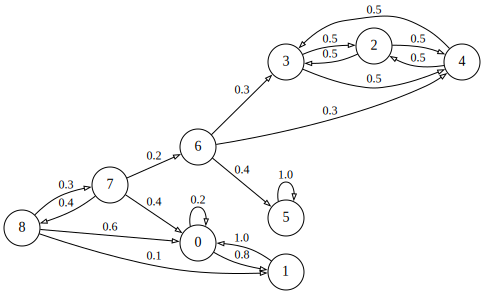

In [53]:
polyerg_trans_mat = np.array([
    [0.2,   0.8,     0,     0,     0,     0,     0,     0,     0  ], 
    [1,     0,       0,     0,     0,     0,     0,     0,     0  ], 
    [0,     0,       0,     0.5,   0.5,   0,     0,     0,     0  ],
    [0,     0,       0.5,   0,     0.5,   0,     0,     0,     0  ], 
    [0,     0,       0.5,   0.5,   0,     0,     0,     0,     0  ], 
    [0,     0,       0,     0,     0,     1,     0,     0,     0  ],
    [0,     0,       0,     0.3,   0.3,   0.4,   0,     0,     0  ], 
    [0.4,   0,       0,     0,     0,     0,     0.2,   0,     0.4], 
    [0.6,   0.1,     0,     0,     0,     0,     0,     0.3,   0  ]
])
polyerg_marchie = MarChie(trans_mat=polyerg_trans_mat)

polyerg_marchie.to_graph()

In [54]:
fancy_forecast(polyerg_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        0          0
        1          1
        2          2
        3          3
        4          4
        5          5
        6          6
        7          7
        8          8

    >> Initial states distribution, canonical numbering (rounded):

[0.203 0.01  0.15  0.12  0.147 0.173 0.012 0.059 0.126]    

    >> Transition matrix, canonical numbering (rounded):

[[0.2 0.8 0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.3 0.3 0.4 0.  0.  0. ]
 [0.4 0.  0.  0.  0.  0.  0.2 0.  0.4]
 [0.6 0.1 0.  0.  0.  0.  0.  0.3 0. ]]

    
        Classification

    >> Inessential states: 6, 7, 8
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0,

## Polyergodic Absorbing Markov Chain

Polyergodic Absorbing Markov Chain is a chain such that

$\exists P, \pi^{(0)}\\$ 
$S_{ie} \neq \varnothing, \quad S_e = \{EC_1, EC_2, ..., EC_L\}\\$
$|EC_1| = |EC_2| = ... = |EC_L| = 1$

<br>
<br>

Assuming the states are numbered canonically,
transition matrix $P$ can be represented as follows:

$$
P = 
\begin{pmatrix}
T & O \\
R & Q \\
\end{pmatrix} = 
\begin{pmatrix}
  1 & 0 & 0 & ... & 0 \\
  0 & 1 & 0 & ... & 0 \\
  0 & 0 & 1 & ... & 0 & O\\
  ... & ... & ... & ... & ...\\
  0 & 0 & 0 & ... & 1 \\
  & & R & & & Q \\
\end{pmatrix},
$$

where

$\qquad T = (N_e \times N_e) = (t_{ij}) | t_{ij} =
\begin{cases}
  1, & i = j   \\
  0, & i \neq j
\end{cases} $ - submatrix managing transitions in $S_e$

$\qquad O = (N_e \times N_{ie}) = (o_{ij}) \, | \, o_{ij} = 0$ - submatrix managing transitions $i \in S_e \rightarrow j \in S_{ie}$

$\qquad R = (N_{ie} \times N_e)$ - submatrix managing transitions $ i \in S_{ie} \rightarrow j \in S_e$

$\qquad Q = (N_{ie} \times N_{ie})$ - submatrix managing transitions in $S_{ie}$

<br>
<br>

**Theorem**:

1. Sequence $\{P\} = \{P, P^{(2)}, ..., P^{(n)}\}$ converges to the final transition matrix $\Pi$ consisting of identity submatrice $T$ for transitions in essential states, zero submatrices $O$ and $Q$ for transitions to inessential states from essential and inessential ones respectively, and submatrix $B$ for probabilities of the system to be captured by an absorbing state, having started in an inessential state:

<br>

$$
\{P\} = \{P, P^{(2)}, ..., P^{(n)}\} \to_{n \to \infty} \Pi
$$

<br>

$$
\Pi = 
\begin{pmatrix}
  \pi_1 \\
  \pi_2 \\
  ... \\
  \pi_{N_e} \\
  ... \\
  \pi_N
\end{pmatrix}
=
\begin{pmatrix}
  T & O \\
  B & Q \\
\end{pmatrix} = 
\begin{pmatrix}
  1 & 0 & 0 & ... & 0 & 0 & ... & 0 \\
  0 & 1 & 0 & ... & 0 & 0 & ... & 0 \\
  0 & 0 & 1 & ... & 0 & 0 & ... & 0 \\
  ... & ... & ... & ... & ... & ... & ... & ...\\
  0 & 0 & 0 & ... & 1 & 0 & ... & 0\\
  & & B & & & 0 & ... & 0
\end{pmatrix},
$$

<br>

$\qquad$ where 

$$
T = (t_{ij}) |  t_{ij} = 
\begin{cases}
  1, & i = j   \\
  0, & i \neq j
\end{cases}
$$
$$
O = (o_{ij}) | o_{ij} = 0
$$
$$
Q = (q_{ij}) | q_{ij} = 0
$$
$$
B = (b_{ij}) | b_{ij} - \text{'probability of the system to be captured by the } j^{th} \text{ absorbing state having started in the } i^{th} \text{ state'}
$$

<br>

$$
B = M \times R
$$
$$
M = (m_{ij}) = (I - Q)^{-1}
$$
$$
I = (N_{ie} \times N_{ie}) - \text{identity matrix}
$$

<br>

$\qquad$ Thus, each row $\pi_t$ of the end matrix $\Pi$ consists of essential **static stochastic** subvector $\pi_e$ and inessential zero subvector $\pi_{ie}$, while $\pi_e$ contains a single one at index $t$ if it stands for transitions from an absorbing state $t$:

$$
\pi_t = (\pi_e, \pi_{ie})
$$

<br>

$$
\pi_e =
\begin{cases}
  (0, ..., 1_t, ..., 0), & t = (1, 2, ..., N_e),   \\
  (b_{t1}, b_{t2}, ..., b_{tN}), & t = (N_e + 1, N_e + 2, ..., N)
\end{cases}
$$
$$
\pi_{ie} = (\pi_{N_e + 1}, \pi_{N_e + 2}, ..., \pi_N) = (0, ..., 0)
$$

<br>
<br>

2. Sequence $\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\}$ converges to the initial states distribution $\pi^{(0)}$ multiplied by the end transition matrix $\Pi$ strongly (weekly), if the chain is regular (cyclic):

$$
\{\pi^{(0)}\} = \{\pi^{(0)}, \pi^{(1)}, ..., \pi^{(n)}\} \to_{n \to \infty} \pi^{(0)} \Pi
$$

<br>

$\qquad$ while if the initial vector distribution represents a one-probability to start in a state $i$, it the states distribution will converge to the row $i$ of the final transition matrix:

$$
\pi^{(0)} = (0, ..., 1_i, ..., 0) \Longrightarrow \{\pi^{(0)}\} \to_{n \to \infty} \pi_i, \quad i = (1, 2, ..., N)
$$

<br>
<br>

3. Each row $\pi_i$ of the final transition matrix is static and stationary:

$$
\forall i: \quad \pi_i P = \pi_i
$$

<br>
<br>

4. Expected values of $\nu_j^{(n)}$ - time percentage that the system finds itself in the state $i$ during $n$ steps - are not supposed to be calculated for polyergodic chains.

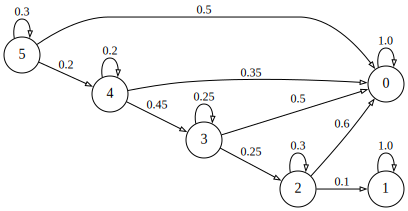

In [55]:
polyerg_abs_trans_mat = np.array([
    [0.3,   0,     0,     0,     0.6,   0.1],
    [0.25,  0.25,  0,     0,     0.5,   0  ], 
    [0,     0.45,  0.2,   0,     0.35,  0  ], 
    [0,     0,     0.2,   0.3,   0.5,   0  ],
    [0,     0,     0,     0,     1,     0  ],
    [0,     0,     0,     0,     0,     1  ]
])
polyerg_abs_marchie = MarChie(trans_mat=polyerg_abs_trans_mat)

polyerg_abs_marchie.to_graph()

In [56]:
fancy_forecast(polyerg_abs_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        4          0
        5          1
        0          2
        1          3
        2          4
        3          5

    >> Initial states distribution, canonical numbering (rounded):

[0.241 0.118 0.281 0.219 0.032 0.109]    

    >> Transition matrix, canonical numbering (rounded):

[[1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.6  0.1  0.3  0.   0.   0.  ]
 [0.5  0.   0.25 0.25 0.   0.  ]
 [0.35 0.   0.   0.45 0.2  0.  ]
 [0.5  0.   0.   0.   0.2  0.3 ]]

    
        Classification

    >> Inessential states: 2, 3, 4, 5
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0


	Equivalency class 1:	d = 1
		(Acyclic):	1

    >> Type:	Polyergodic Absorbing


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[0.764 0.236 0.    0.    0.    0.   

# More examples

### Ergodic Regular Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0.4 & 0.6 \\
    0.3 & 0.7
\end{pmatrix}
$$

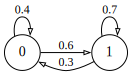

In [57]:
erg_reg_trans_mat = np.array([
    [0.4,   0.6],
    [0.3,   0.7]
])
erg_reg_marchie = MarChie(trans_mat=erg_reg_trans_mat)

erg_reg_marchie.to_graph()

In [58]:
fancy_forecast(erg_reg_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        0          0
        1          1

    >> Initial states distribution, canonical numbering (rounded):

[0.48 0.52]    

    >> Transition matrix, canonical numbering (rounded):

[[0.4 0.6]
 [0.3 0.7]]

    
        Classification

    >> Inessential states: (None)
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0, 1

    >> Type:	Ergodic Regular


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[0.333 0.667]

    >> End transition matrix, forecast (rounded):

[[0.333 0.667]
 [0.333 0.667]]

    >> States time percentage, forecast (rounded):

[33.333 66.667]


        End Behavior. Empirical Data

    >> States distribution in 10000 steps (rounded):

[[0.333 0.667]
 [0.333 0.667]]

    >> Transition matrix in 10000 steps (rounded):

[0.333 0.667]
    


### Ergodic Cyclic Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0 & 1 & 0 & 0 & 0\\
    q & 0 & p & 0 & 0 \\
    0 & q & 0 & p & 0 \\
    0 & 0 & q & 0 & p \\
    0 & 0 & 0 & 1 & 0
\end{pmatrix}
$$

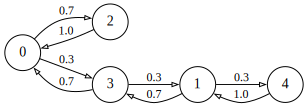

In [59]:
p = 0.3
q = 1 - p

erg_cyc_trans_mat = np.array([
    [0, 1, 0, 0, 0], 
    [q, 0, p, 0, 0],
    [0, q, 0, p, 0],
    [0, 0, q, 0, p],
    [0, 0, 0, 1, 0]
])
erg_cyc_marchie = MarChie(trans_mat=erg_cyc_trans_mat)

erg_cyc_marchie.to_graph()

In [60]:
fancy_forecast(erg_cyc_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        1          0
        3          1
        0          2
        2          3
        4          4

    >> Initial states distribution, canonical numbering (rounded):

[0.354 0.015 0.221 0.245 0.165]    

    >> Transition matrix, canonical numbering (rounded):

[[0.  0.  0.7 0.3 0. ]
 [0.  0.  0.  0.7 0.3]
 [1.  0.  0.  0.  0. ]
 [0.7 0.3 0.  0.  0. ]
 [0.  1.  0.  0.  0. ]]

    
        Classification

    >> Inessential states: (None)
    >> Essential states:
	
	Equivalency class 0:	d = 2
		Cyclic subclass 0:	0, 1
		Cyclic subclass 1:	2, 3, 4

    >> Type:	Ergodic Cyclic


        End Behavior. Forecast

    >> Convergence: weak
    >> End states distribution, forecast (rounded):

[0.422 0.078 0.296 0.181 0.023]

    >> End transition matrix, forecast (rounded):

[[0.422 0.078 0.296 0.181 0.023]
 [0.422 0.078 0.296 0.181 0.023]
 [0.422 0.078 

### Monoergodic Regular Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0 & 0.5 & 0 & 0.5 \\
    0.5 & 0 & 0 & 0   \\
    0 & 0 & 0.5 & 0 & 0.5 \\
    0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

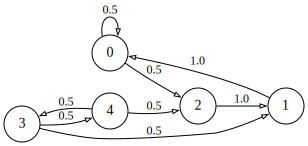

In [61]:
monoerg_reg_trans_mat = np.array([
    [0,     0.5,   0,     0.5,   0],
    [0.5,   0,     0,     0,   0.5],
    [0,     0,     0.5,   0,   0.5],
    [0,     0,     1,     0,     0],
    [0,     0,     0,     1,     0]
])
monoerg_reg_marchie = MarChie(trans_mat=monoerg_reg_trans_mat)

monoerg_reg_marchie.to_graph()

In [62]:
fancy_forecast(monoerg_reg_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        2          0
        3          1
        4          2
        0          3
        1          4

    >> Initial states distribution, canonical numbering (rounded):

[0.45  0.136 0.258 0.084 0.072]    

    >> Transition matrix, canonical numbering (rounded):

[[0.5 0.  0.5 0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5]
 [0.  0.  0.5 0.5 0. ]]

    
        Classification

    >> Inessential states: 3, 4
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0, 1, 2

    >> Type:	Monoergodic Regular


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[0.5  0.25 0.25 0.   0.  ]

    >> End transition matrix, forecast (rounded):

[[0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [

### Monoergodic Absorbing Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0,5 & 0.3 & 0.2 & 0 \\
    0 & 0.4 & 0.4 & 0.2 \\
    0 & 0 & 0.3 & 0.7 \\
    0 & 0 & 0 & 1 
\end{pmatrix}
$$

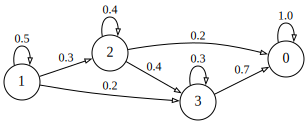

In [63]:
monoerg_abs_trans_mat = np.array([
    [0.5,   0.3,   0.2,     0  ],
    [0,     0.4,   0.4,     0.2],
    [0,     0,     0.3,     0.7],
    [0,     0,     0,       1  ]
])
monoerg_abs_marchie = MarChie(trans_mat=monoerg_abs_trans_mat)

monoerg_abs_marchie.to_graph()

In [64]:
fancy_forecast(monoerg_abs_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        3          0
        0          1
        1          2
        2          3

    >> Initial states distribution, canonical numbering (rounded):

[0.306 0.235 0.284 0.175]    

    >> Transition matrix, canonical numbering (rounded):

[[1.  0.  0.  0. ]
 [0.  0.5 0.3 0.2]
 [0.2 0.  0.4 0.4]
 [0.7 0.  0.  0.3]]

    
        Classification

    >> Inessential states: 1, 2, 3
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0

    >> Type:	Monoergodic Absorbing


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[1. 0. 0. 0.]

    >> End transition matrix, forecast (rounded):

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

    >> States time percentage, forecast (rounded):

[100.   0.   0.   0.]


        End Behavior. Empirical Data

    >> States dist

### Monoergodic Cyclic Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0.5 & 0.5 & 0 & 0 & 0 & 0 \\
    0.25 & 0.25 & 0.25 & 0 & 0.25 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0.5 & 0.5 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0.25 & 0 & 0.25 & 0.5 & 0
\end{pmatrix}
$$

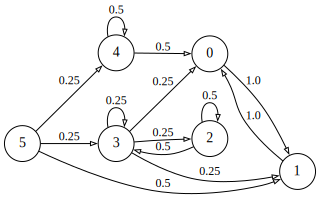

In [65]:
monoerg_cyc_trans_mat = np.array([
    [0.5,    0.5,    0,      0,      0,      0],
    [0.25,   0.25,   0.25,   0,      0.25,   0],
    [0,      0,      0,      0,      1,      0],
    [0,      0,      0.5,    0.5,    0,      0],
    [0,      0,      1,      0,      0,      0],
    [0,      0.25,   0,      0.25,   0.5,    0]
])
monoerg_cyc_marchie = MarChie(trans_mat=monoerg_cyc_trans_mat)

monoerg_cyc_marchie.to_graph()

In [66]:
fancy_forecast(monoerg_cyc_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        2          0
        4          1
        0          2
        1          3
        3          4
        5          5

    >> Initial states distribution, canonical numbering (rounded):

[0.283 0.273 0.104 0.286 0.013 0.041]    

    >> Transition matrix, canonical numbering (rounded):

[[0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.5  0.   0.  ]
 [0.25 0.25 0.25 0.25 0.   0.  ]
 [0.5  0.   0.   0.   0.5  0.  ]
 [0.   0.5  0.   0.25 0.25 0.  ]]

    
        Classification

    >> Inessential states: 2, 3, 4, 5
    >> Essential states:
	
	Equivalency class 0:	d = 2
		Cyclic subclass 0:	0
		Cyclic subclass 1:	1

    >> Type:	Monoergodic Cyclic


        End Behavior. Forecast

    >> Convergence: weak
    >> End states distribution, forecast (rounded):

[0.5 0.5 0.  0.  0.  0. ]

    >> End transition matrix

### Polyergodic Regular Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0.3 & 0 & 0 & 0 & 0 & 0.7 & 0 & 0 & 0 \\  
    0 & 0 & 0.5 & 0 & 0 & 0 & 0 & 0.5 & 0 \\  
    0 & 0.5 & 0 & 0 & 0 & 0 & 0 & 0.5 & 0 \\ 
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\  
    0 & 0 & 0.3 & 0.3 & 0 & 0 & 0 & 0.4 & 0 \\  
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
    0.2 & 0 & 0 & 0 & 0.1 & 0 & 0 & 0 & 0.7 \\ 
    0 & 0.5 & 0.5 & 0 & 0 & 0 & 0 & 0 & 0 \\  
    0.6 & 0 & 0 & 0 & 0 & 0.25 & 0.15 & 0 & 0 \\ 
\end{pmatrix}
$$

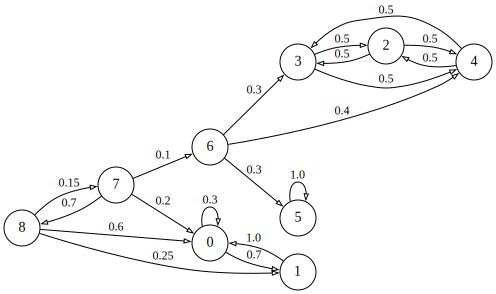

In [67]:
polyerg_reg_trans_mat = np.array([
    [0.3,   0,     0,     0,     0,     0.7,   0,     0,     0  ],   
    [0,     0,     0.5,   0,     0,     0,     0,     0.5,   0  ],   
    [0,     0.5,   0,     0,     0,     0,     0,     0.5,   0  ],
    [0,     0,     0,     1,     0,     0,     0,     0,     0  ],   
    [0,     0,     0.3,   0.3,   0,     0,     0,     0.4,   0  ],   
    [1,     0,     0,     0,     0,     0,     0,     0,     0  ],
    [0.2,   0,     0,     0,     0.1,   0,     0,     0,     0.7],   
    [0,     0.5,   0.5,   0,     0,     0,     0,     0,     0  ],   
    [0.6,   0,     0,     0,     0,     0.25,  0.15,  0,     0  ]
])
polyerg_reg_marchie = MarChie(trans_mat=polyerg_reg_trans_mat)

polyerg_reg_marchie.to_graph()

In [68]:
fancy_forecast(polyerg_reg_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        0          0
        5          1
        1          2
        2          3
        7          4
        3          5
        4          6
        6          7
        8          8

    >> Initial states distribution, canonical numbering (rounded):

[0.042 0.191 0.077 0.144 0.014 0.142 0.11  0.115 0.164]    

    >> Transition matrix, canonical numbering (rounded):

[[0.3  0.7  0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.5  0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.5  0.5  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.3  0.4  0.3  0.   0.   0.  ]
 [0.2  0.   0.   0.   0.   0.   0.1  0.   0.7 ]
 [0.6  0.25 0.   0.   0.   0.   0.   0.15 0.  ]]

    
        Classification

    >> Inessential state

### Polyergodic Absorbing Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    1 & 0 & 0 & 0 & 0\\
    q & 0 & p & 0 & 0 \\
    0 & q & 0 & p & 0 \\
    0 & 0 & q & 0 & p \\
    0 & 0 & 0 & 0 & 1
\end{pmatrix}
$$

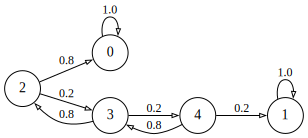

In [69]:
p = 0.2
q = 1 - p


polyerg_abs_trans_mat = np.array([
    [1, 0, 0, 0, 0], 
    [q, 0, p, 0, 0],
    [0, q, 0, p, 0],
    [0, 0, q, 0, p],
    [0, 0, 0, 0, 1]
])
polyerg_abs_marchie = MarChie(trans_mat=polyerg_abs_trans_mat)

polyerg_abs_marchie.to_graph()

In [70]:
fancy_forecast(polyerg_abs_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        0          0
        4          1
        1          2
        2          3
        3          4

    >> Initial states distribution, canonical numbering (rounded):

[0.191 0.13  0.646 0.02  0.012]    

    >> Transition matrix, canonical numbering (rounded):

[[1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.8 0.  0.  0.2 0. ]
 [0.  0.  0.8 0.  0.2]
 [0.  0.2 0.  0.8 0. ]]

    
        Classification

    >> Inessential states: 2, 3, 4
    >> Essential states:
	
	Equivalency class 0:	d = 1
		(Acyclic):	0


	Equivalency class 1:	d = 1
		(Acyclic):	1

    >> Type:	Polyergodic Absorbing


        End Behavior. Forecast

    >> Convergence: strong
    >> End states distribution, forecast (rounded):

[0.321 0.679 0.    0.    0.   ]

    >> End transition matrix, forecast (rounded):

[[1.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]

### Polyergodic Cyclic Markov Chain

Transition matrix:

$$
P =
\begin{pmatrix}
    0 & 0.3 & 0.7 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0.2 & 0 & 0 & 0.8 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0
\end{pmatrix}
$$

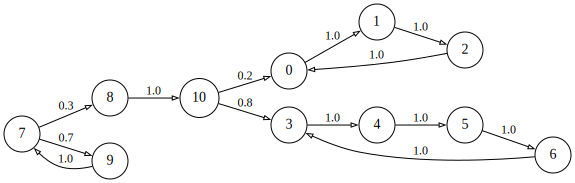

In [71]:
polyerg_cyc_trans_mat = np.array([
    [0,     0.3,   0.7,   0,     0,     0,     0,     0,     0,     0,     0],
    [0,     0,     0,     1,     0,     0,     0,     0,     0,     0,     0],
    [1,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
    [0,     0,     0,     0,     0.2,   0,     0,     0.8,   0,     0,     0],
    [0,     0,     0,     0,     0,     1,     0,     0,     0,     0,     0],
    [0,     0,     0,     0,     0,     0,     1,     0,     0,     0,     0],
    [0,     0,     0,     0,     1,     0,     0,     0,     0,     0,     0],
    [0,     0,     0,     0,     0,     0,     0,     0,     1,     0,     0],
    [0,     0,     0,     0,     0,     0,     0,     0,     0,     1,     0],
    [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     1],
    [0,     0,     0,     0,     0,     0,     0,     1,     0,     0,     0]
])
polyerg_cyc_marchie = MarChie(trans_mat=polyerg_cyc_trans_mat)

polyerg_cyc_marchie.to_graph()

In [72]:
fancy_forecast(polyerg_cyc_marchie)


        Canonical Numbering (further the states will be numbered canonically)
        
    >> Canonical mapping:

 original  canonical
        4          0
        5          1
        6          2
        7          3
        8          4
        9          5
       10          6
        0          7
        1          8
        2          9
        3         10

    >> Initial states distribution, canonical numbering (rounded):

[0.13  0.033 0.158 0.067 0.153 0.17  0.147 0.049 0.031 0.031 0.031]    

    >> Transition matrix, canonical numbering (rounded):

[[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.7 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  